Plot fit error distributions from different model fits to Baker et al data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

import record_0_main as rcd_0
import record_1_ma_ext as rcd_1
import record_2_lin_ln as rcd_2

from disp import set_plot, plot_b

FPS = 30.03
DT = 1/FPS

NNRN = 224

In [2]:
df_s = pd.read_csv('data/simple/neur/baker_resampled_s.csv')
df_p = pd.read_csv('data/simple/neur/baker_resampled_p.csv')

In [3]:
T = np.array(df_s['T'])
I_S = np.array(df_s['S'])
I_P = np.array(df_p['P'])

R_SS = np.array(df_s[[f'R_{cnrn}' for cnrn in range(NNRN)]])
R_PS = np.array(df_p[[f'R_{cnrn}' for cnrn in range(NNRN)]])

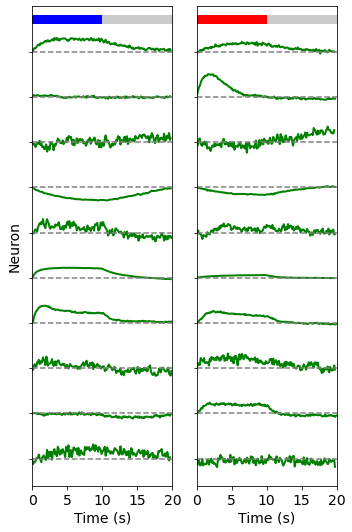

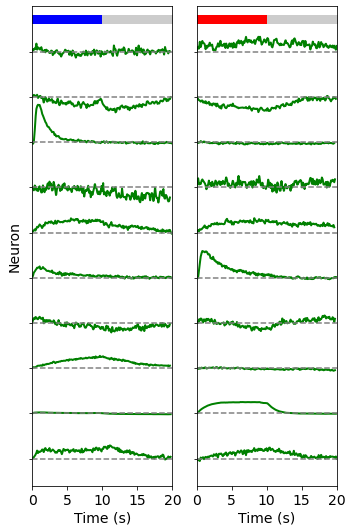

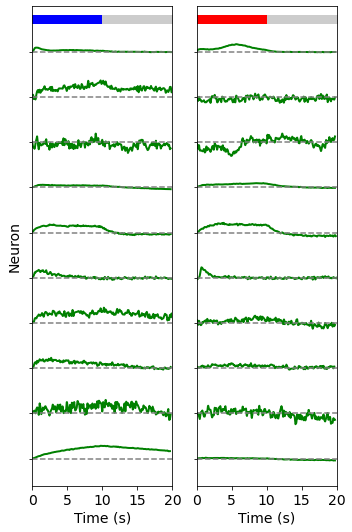

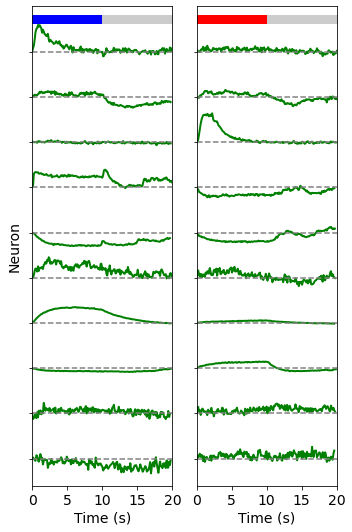

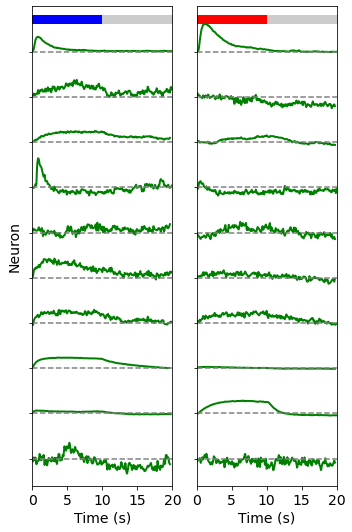

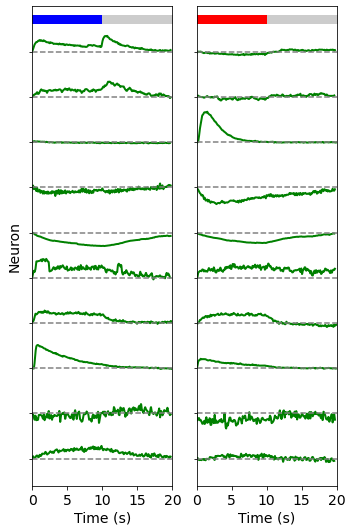

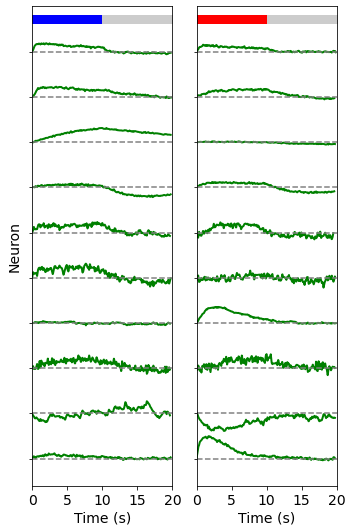

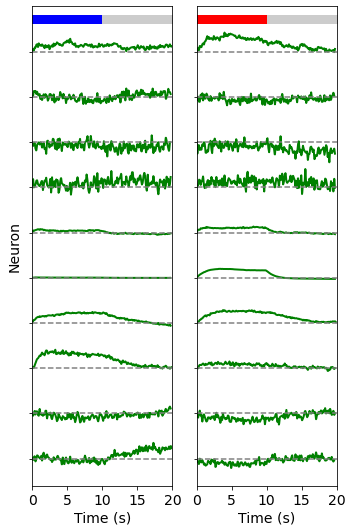

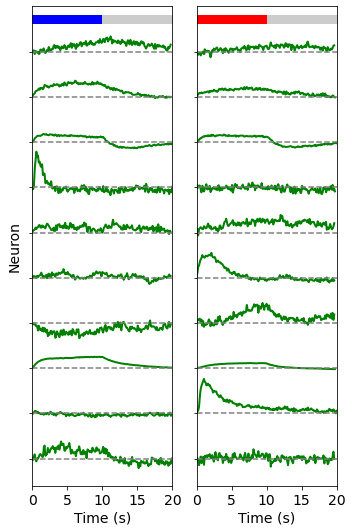

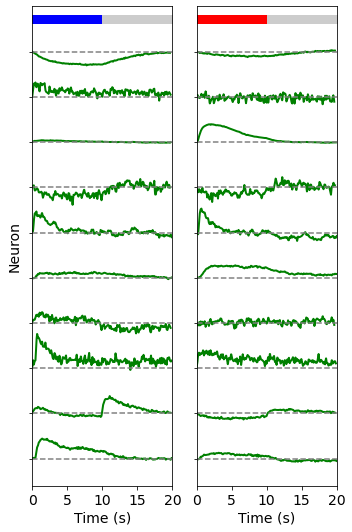

In [6]:
# plot same neurons without model fits
# nrns_plot = [11, 79, 148, 5, 21, 118, 70, 180, 35]
idx_rnd = np.random.permutation(NNRN)
nper_fig = 10
nfig = 10

for cfig in range(nfig):
    nrns_plot = idx_rnd[cfig*nper_fig:(cfig+1)*nper_fig]
    nplot = len(nrns_plot)

    fig, axs = plt.subplots(1, 2, figsize=(5, nplot*.75), tight_layout=True, sharey=True)

    y_ticks = []

    for cnrn, inrn in enumerate(nrns_plot):
        y_tick = -5*cnrn

        axs[0].plot(T, R_SS[:, inrn]/2+y_tick, c='green', lw=2)

        axs[0].axhline(y_tick, c='gray', ls='--')

        axs[1].plot(T, R_PS[:, inrn]/2+y_tick, c='green', lw=2)

        axs[1].axhline(y_tick, c='gray', ls='--')

        y_ticks.append(y_tick)

    b_s = np.zeros(len(T))
    b_s[I_S == 1] = 1

    plot_b(axs[0], T, b_s, extent=[T[0], T[-1]+DT, 3, 4], c=[(.8, .8, .8), 'b', 'r'])

    b_p = np.zeros(len(T))
    b_p[I_P == 1] = 2

    plot_b(axs[1], T, b_p, extent=[T[0], T[-1]+DT, 3, 4], c=[(.8, .8, .8), 'b', 'r'])

    axs[0].set_ylabel('Neuron')

    # y_tick_labels = np.arange(nplot)+1+cfig*nper_fig
    y_tick_labels = []
    for ax in axs:
        set_plot(ax, x_lim=(0, 20), y_lim=(-5*nplot+2, 5), y_ticks=y_ticks, y_tick_labels=y_tick_labels, x_label='Time (s)', font_size=14)
        
    fig.savefig(f'supp/fig_s1_baker_xpls_{cfig}.svg')